In [1]:
%matplotlib widget


# Test 01

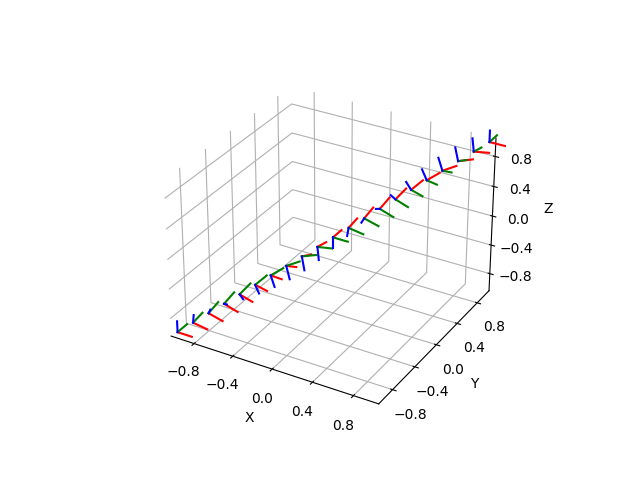

In [2]:
import numpy as np
from scipy.spatial.transform import Rotation as R
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pytransform3d.rotations import (
    quaternion_integrate, matrix_from_quaternion, plot_basis)


angular_velocities = np.empty((21, 3))
angular_velocities[:, :] = np.array([np.sqrt(0.5), np.sqrt(0.5), 0.0])
angular_velocities *= np.pi

Q = quaternion_integrate(angular_velocities, dt=0.1)
# print(Q)
ax = None
for t in range(len(Q)):
    Rot = matrix_from_quaternion(Q[t])
    p = 2 * (t / (len(Q) - 1) - 0.5) * np.ones(3)
#     print(p)
    ax = plot_basis(ax=ax, s=0.15, R=Rot, p=p)
plt.show()

In [3]:
with open('/home/latai/Downloads/data/test_01/ARCore_sensor_pose.txt') as f:
    lines = f.readlines()

In [4]:
lines[1].split()

['257318484244692',
 '-0.157415',
 '0.009155',
 '0.021936',
 '0.987246',
 '-0.028210',
 '-0.001686',
 '0.252041']

In [5]:
list(map(float, lines[1].split()))

[257318484244692.0,
 -0.157415,
 0.009155,
 0.021936,
 0.987246,
 -0.02821,
 -0.001686,
 0.252041]

In [6]:
quat_values = []
trans_values = []

for i in lines[1:]:
    quat_values.append(list(map(float, i.split()))[1:5])
    trans_values.append(list(map(float, i.split()))[5:])

In [7]:
quat_values_np = np.array(quat_values)
trans_values_np = np.array(trans_values)

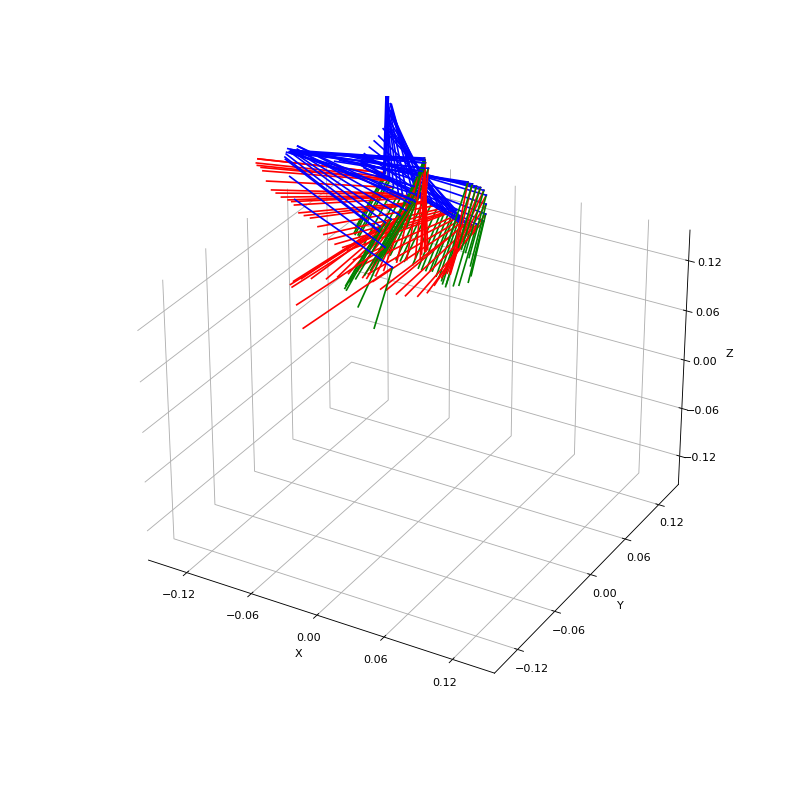

In [8]:


figure(figsize=(10, 10), dpi=80)
ax = None
for t in range(len(quat_values_np)):
    R = matrix_from_quaternion(quat_values_np[t])
    
    ax = plot_basis(ax=ax, s=0.1, R=R, p=trans_values_np[t], ax_s=0.15)
    
plt.show()

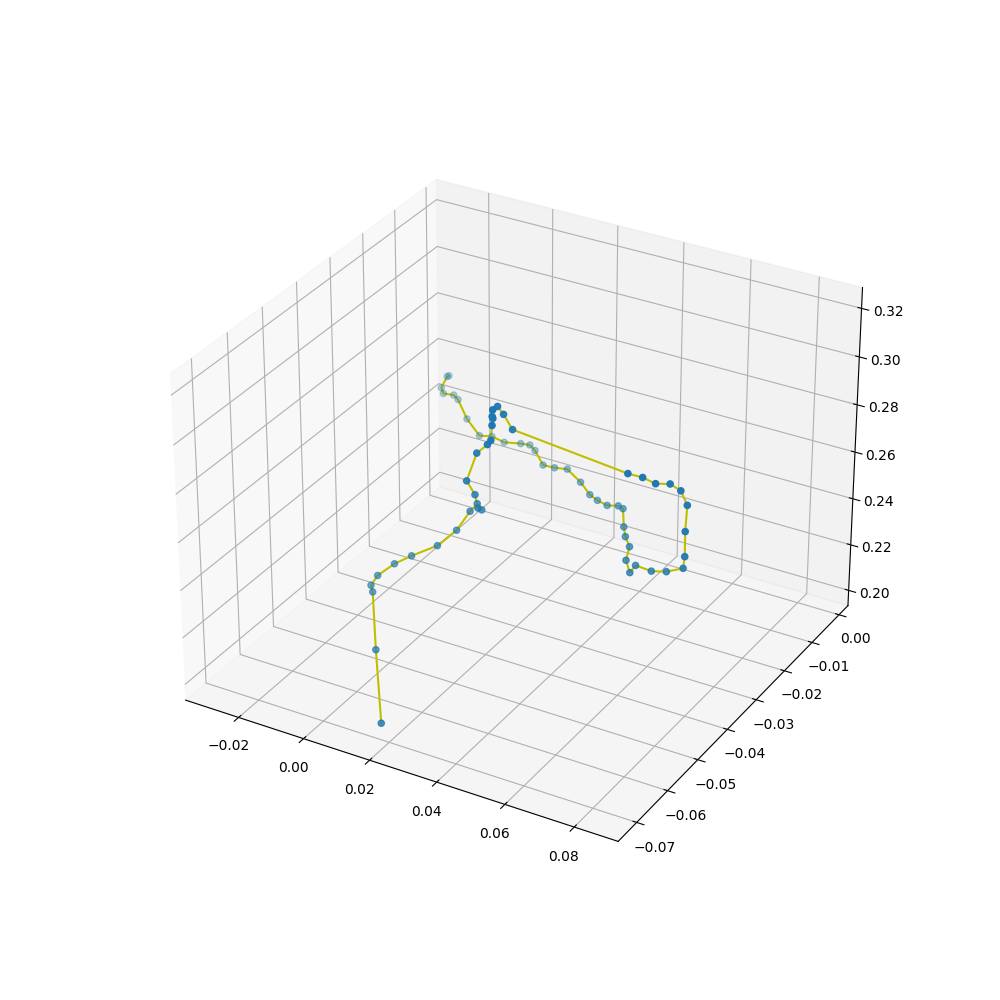

In [9]:
import matplotlib.pyplot as plt
import random

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

sequence_containing_x_vals =  [x[0] for x in trans_values_np]
sequence_containing_y_vals =  [x[1] for x in trans_values_np]
sequence_containing_z_vals =  [x[2] for x in trans_values_np]


ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
ax.plot(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, color='y')

plt.show()

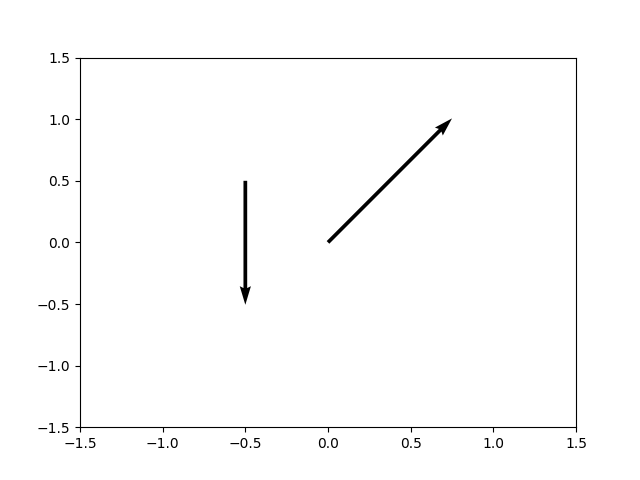

In [10]:

fig, ax = plt.subplots()

x_pos = [0, -0.5]
y_pos = [0, 0.5]
x_direct = [1, 0]
y_direct = [1, -1]

ax.quiver(x_pos,y_pos,x_direct,y_direct, scale=4)
ax.axis([-1.5,1.5,-1.5,1.5])

plt.show()

In [11]:
x_x = []
y_x = []
z_x = []

x_y = []
y_y = []
z_y = []

x_z = []
y_z = []
z_z = []

for i in quat_values_np:
    r = R.from_quat(i)
    x_x.append(r.as_matrix()[:,0][0])
    y_x.append(r.as_matrix()[:,0][1])
    z_x.append(r.as_matrix()[:,0][2])
    x_y.append(r.as_matrix()[:,1][0])
    y_y.append(r.as_matrix()[:,1][1])
    z_y.append(r.as_matrix()[:,1][2])
    x_z.append(r.as_matrix()[:,2][0])
    y_z.append(r.as_matrix()[:,2][1])
    z_z.append(r.as_matrix()[:,2][2])

AttributeError: 'numpy.ndarray' object has no attribute 'from_quat'

In [12]:
values1 = []
values2 = []
values3 = []

for i,j,k,a,b,c in zip(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, x_x, y_x, z_x):
    values1.append([i,j,k,a,b,c])

for i,j,k,a,b,c in zip(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, x_y, y_y, z_y):
    values2.append([i,j,k,a,b,c])

for i,j,k,a,b,c in zip(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, x_z, y_z, z_z):
    values3.append([i,j,k,a,b,c])

In [13]:
soa1 = np.array(values1)
X_x, Y_x, Z_x, U_x, V_x, W_x = zip(*soa1)

soa2 = np.array(values2)
X_y, Y_y, Z_y, U_y, V_y, W_y = zip(*soa2)

soa3 = np.array(values3)
X_z, Y_z, Z_z, U_z, V_z, W_z = zip(*soa3)



# Color by azimuthal angle
c = np.arctan2(U_z, V_z)
# Flatten and normalize
c = (c.ravel() - c.min()) / c.ptp()
# Repeat for each body line and two head lines
c = np.concatenate((c, np.repeat(c, 2)))
# Colormap
c = plt.cm.hsv(c)

fig = plt.figure(figsize=(10, 10))
# ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X_x+X_y+X_z, Y_x+Y_y+Y_z, Z_x+Z_y+Z_z, U_x+U_y+U_z, V_x+V_y+V_z, W_x+W_y+W_z, length=0.006, normalize=True)
# ax.quiver(X_y, Y_y, Z_y, U_y, V_y, W_y, length=0.006, normalize=True, cmap='Reds')
# ax.quiver(X_z, Y_z, Z_z, U_z, V_z, W_z, length=0.006, normalize=True, cmap='Reds')
ax.plot(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, color='y')
plt.show()

ValueError: not enough values to unpack (expected 6, got 0)

# Test - 02

In [14]:
with open('/home/latai/Downloads/data/test_02/ARCore_sensor_pose.txt') as f:
    lines = f.readlines()

In [15]:
quat_values = []
trans_values = []

for i in lines[1:]:
    quat_values.append(list(map(float, i.split()))[1:5])
    trans_values.append(list(map(float, i.split()))[5:])

In [16]:
quat_values_np = np.array(quat_values)
trans_values_np = np.array(trans_values)

In [17]:
sequence_containing_x_vals =  [x[0] for x in trans_values_np]
sequence_containing_y_vals =  [x[1] for x in trans_values_np]
sequence_containing_z_vals =  [x[2] for x in trans_values_np]

In [18]:
x_x = []
y_x = []
z_x = []

x_y = []
y_y = []
z_y = []

x_z = []
y_z = []
z_z = []

for i in quat_values_np:
    r = R.from_quat(i)
    x_x.append(r.as_matrix()[:,0][0])
    y_x.append(r.as_matrix()[:,0][1])
    z_x.append(r.as_matrix()[:,0][2])
    x_y.append(r.as_matrix()[:,1][0])
    y_y.append(r.as_matrix()[:,1][1])
    z_y.append(r.as_matrix()[:,1][2])
    x_z.append(r.as_matrix()[:,2][0])
    y_z.append(r.as_matrix()[:,2][1])
    z_z.append(r.as_matrix()[:,2][2])

AttributeError: 'numpy.ndarray' object has no attribute 'from_quat'

In [19]:
values1 = []
values2 = []
values3 = []

for i,j,k,a,b,c in zip(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, x_x, y_x, z_x):
    values1.append([i,j,k,a,b,c])

for i,j,k,a,b,c in zip(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, x_y, y_y, z_y):
    values2.append([i,j,k,a,b,c])

for i,j,k,a,b,c in zip(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, x_z, y_z, z_z):
    values3.append([i,j,k,a,b,c])

In [20]:
soa1 = np.array(values1)
X_x, Y_x, Z_x, U_x, V_x, W_x = zip(*soa1)

soa2 = np.array(values2)
X_y, Y_y, Z_y, U_y, V_y, W_y = zip(*soa2)

soa3 = np.array(values3)
X_z, Y_z, Z_z, U_z, V_z, W_z = zip(*soa3)



# Color by azimuthal angle
c = np.arctan2(U_z, V_z)
# Flatten and normalize
c = (c.ravel() - c.min()) / c.ptp()
# Repeat for each body line and two head lines
c = np.concatenate((c, np.repeat(c, 2)))
# Colormap
c = plt.cm.hsv(c)

fig = plt.figure(figsize=(10, 10),dpi=100)
# ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X_x+X_y+X_z, Y_x+Y_y+Y_z, Z_x+Z_y+Z_z, U_x+U_y+U_z, V_x+V_y+V_z, W_x+W_y+W_z, length=0.02, normalize=True)
# ax.quiver(X_y, Y_y, Z_y, U_y, V_y, W_y, length=0.006, normalize=True, cmap='Reds')
# ax.quiver(X_z, Y_z, Z_z, U_z, V_z, W_z, length=0.006, normalize=True, cmap='Reds')
ax.plot(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, color='y')
plt.show()

ValueError: not enough values to unpack (expected 6, got 0)

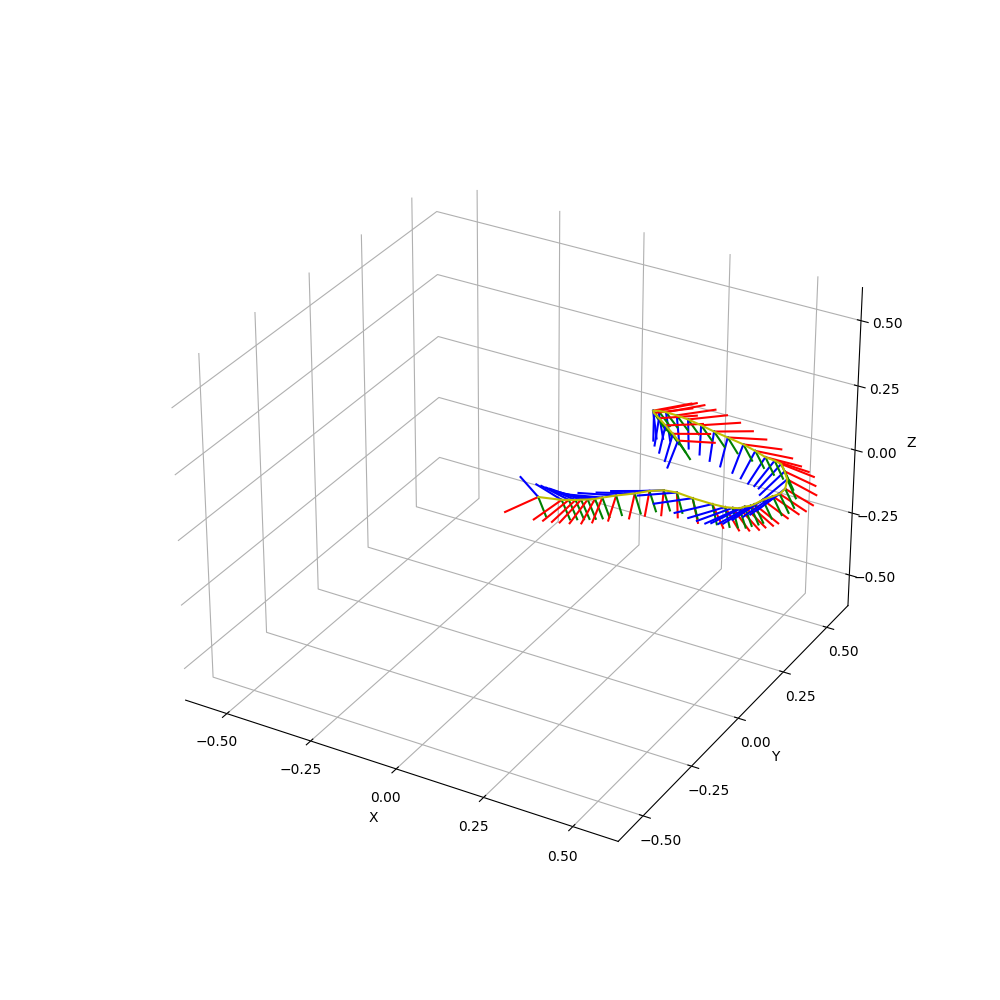

In [21]:
figure(figsize=(10, 10), dpi=100)
ax = None
for t in range(len(quat_values_np)):
    R = matrix_from_quaternion(quat_values_np[t])
    
    ax = plot_basis(ax=ax, s=0.1, R=R, p=trans_values_np[t], ax_s=0.6)
ax.plot(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, color='y')
plt.show()